<a target="_blank" href="https://colab.research.google.com/github/giordamaug/HELP/blob/main/help/notebooks/prediction.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a target="_blank" href="https://www.kaggle.com/notebooks/welcome?src=https://github.com/giordamaug/HELP/blob/main/help/notebooks/prediction.ipynb">
  <img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Colab"/>
</a>

# Install HELP from GitHub
Skip this cell if you alread have installed HELP.

In [1]:
!pip install git+https://github.com/giordamaug/HELP.git

  Cloning https://github.com/giordamaug/HELP.git to /tmp/pip-req-build-qbbtpyts
  Running command git clone --filter=blob:none --quiet https://github.com/giordamaug/HELP.git /tmp/pip-req-build-qbbtpyts
  Resolved https://github.com/giordamaug/HELP.git to commit c10f21394a1d749bd8619d23174d4a60b30a6379
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.3 MB/s eta 0:00:00
  Created wheel for help: filename=help-1.0-py3-none-any.whl size=35901 sha256=de3e55c681a51898b5e456150028a7af2a92aa02f26dd0e8e58020c07bb8e4a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-wo0mvv4_/wheels/2b/c2/d4/1e25efd10be848dfb30253a32bf049902129bae3b25aa84873
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=fad5465a20db9ba908217ef67afb6146ce03073bcc2492903ee5dd144d8f2785
  Stored in directory: /root/.cach

# Download the input files
In this cell we download from GitHub repository the label file and the attribute files. Skip this step if you already have these input files locally.

In [2]:
!wget https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/Kidney_HELP.csv
!wget https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/Kidney_BIO.csv
for i in range(5):
  !wget https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/Kidney_CCcfs_{i}.csv
!wget https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/Kidney_EmbN2V_128.csv

--2024-03-07 21:00:20--  https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/Kidney_HELP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180249 (176K) [text/plain]
Saving to: ‘Kidney_HELP.csv’

Kidney_HELP.csv     100%[===================>] 176.02K  --.-KB/s    in 0.006s  

2024-03-07 21:00:20 (29.3 MB/s) - ‘Kidney_HELP.csv’ saved [180249/180249]

--2024-03-07 21:00:20--  https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/Kidney_BIO.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209857

# Set your datapath

In [3]:
#%cd <your-data-directory>

# Process the tissue attributes
In this code we load tissue gene attributes by several datafiles. We apply missing values fixing and data scaling with `sklearn.preprocessing.StandardScaler` on the `BIO` and `CCcfs` attributes, while no normalization and fixing on embedding attributes (`EmbN2V_128`). The attributes are all merged in one matrix by the `feature_assemble` function as input for the prediction model building.

In [2]:
tissue='Kidney'
import pandas as pd
from help.preprocess.loaders import feature_assemble_df
import os
df_y = pd.read_csv(f"{tissue}_HELP.csv", index_col=0)
df_y = df_y.replace({'aE': 'NE', 'sNE': 'NE'})
print(df_y.value_counts(normalize=False))
features = [{'fname': f'{tissue}_BIO.csv', 'fixna' : False, 'normalize': 'std'},
            {'fname': f'{tissue}_CCcfs.csv', 'fixna' : False, 'normalize': 'std', 'nchunks' : 5},
            {'fname': f'{tissue}_EmbN2V_128.csv', 'fixna' : False, 'normalize': None}]
df_X, df_y = feature_assemble_df(df_y, features=features, subsample=False, seed=1, saveflag=False, verbose=True)
pd.merge(df_X, df_y, left_index=True, right_index=True, how='outer')

label
NE       16678
E         1253
dtype: int64
Majority NE 16678 minoriy E 1253
[Kidney_BIO.csv] found 52532 Nan...
[Kidney_BIO.csv] Normalization with std ...


Loading file in chunks: 100%|██████████| 5/5 [00:11<00:00,  2.36s/it]


[Kidney_CCcfs.csv] found 6676644 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
[Kidney_EmbN2V_128.csv] found 0 Nan...
[Kidney_EmbN2V_128.csv] No normalization...
17236 labeled genes over a total of 17931
(17236, 3456) data input


,Gene length,Transcripts count,GC content,GTEX_kidney,Gene-Disease association,OncoDB_expression,HPA_kidney,GO-MF,GO-BP,GO-CC,...,Node2Vec_119,Node2Vec_120,Node2Vec_121,Node2Vec_122,Node2Vec_123,Node2Vec_124,Node2Vec_125,Node2Vec_126,Node2Vec_127,label
A1BG,0.003351,0.020942,0.501832,2.044542e-05,0.002950,NaN,0.000002,NaN,NaN,0.115385,...,0.120922,-0.352630,0.580697,-0.659300,-1.320486,1.019308,-0.469064,0.123211,0.557266,NE
A1CF,0.034865,0.047120,0.160530,1.980884e-05,NaN,0.556939,0.000232,0.069767,0.041026,0.096154,...,-1.162494,0.155702,-1.162071,0.534082,0.798872,0.149595,-0.360515,-1.060540,-0.408493,NE
A2M,0.019624,0.062827,0.176932,3.377232e-03,0.073746,0.584540,0.005382,0.302326,0.056410,0.076923,...,0.150766,1.492019,0.209449,-1.034729,-0.064318,0.029690,0.138344,0.806095,-0.496128,NE
A2ML1,0.026017,0.041885,0.299948,5.123403e-07,0.017699,NaN,0.000000,0.069767,0.005128,0.038462,...,0.191344,-0.542462,0.746510,0.082089,-1.109212,0.406936,-1.332319,-0.363864,0.443284,NE
A3GALT2,0.005784,0.000000,0.473739,1.421472e-06,NaN,0.663540,0.000000,0.069767,0.015385,0.057692,...,0.483003,-0.197605,0.164332,0.040729,-0.552362,0.242761,0.223486,0.017539,-0.526580,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.021209,0.010471,0.288257,7.073108e-06,NaN,0.634761,0.000055,NaN,NaN,0.000000,...,-0.717935,-0.072597,0.585837,0.172081,-0.278010,0.170799,0.267462,-0.211294,-0.940943,NE
ZYG11B,0.040775,0.005236,0.248648,7.271294e-05,NaN,0.646090,0.000238,0.000000,0.005128,0.000000,...,0.372134,0.007040,-0.278071,-1.309595,-0.352476,0.732887,0.156505,0.516706,-0.412953,NE
ZYX,0.003958,0.047120,0.539522,8.282866e-04,NaN,0.672638,0.000177,0.046512,0.035897,0.153846,...,-0.316321,-0.382132,0.400354,0.322564,0.400369,0.188850,0.593201,-0.093008,-0.508902,NE
ZZEF1,0.056017,0.052356,0.304484,9.626291e-05,NaN,NaN,0.000121,0.093023,NaN,NaN,...,-0.520060,-0.000595,-0.101278,-0.468345,0.240905,-0.124018,0.568793,-0.422793,-0.701705,NE


# Prediction
We process k-fold cross validation of a LightGBM classifier (`n_splits=5`), and then we store predictions and print metrics.

{'E': 0, 'NE': 1}
label
NE       15994
E         1242
dtype: int64
Classification with LightGBM...


5-fold: 100%|██████████| 5/5 [05:10<00:00, 62.04s/it]


,measure
ROC-AUC,0.9551±0.0063
Accuracy,0.9470±0.0033
BA,0.8326±0.0126
Sensitivity,0.6989±0.0244
Specificity,0.9663±0.0025
MCC,0.6283±0.0220
CM,"[[868, 374], [539, 15455]]"


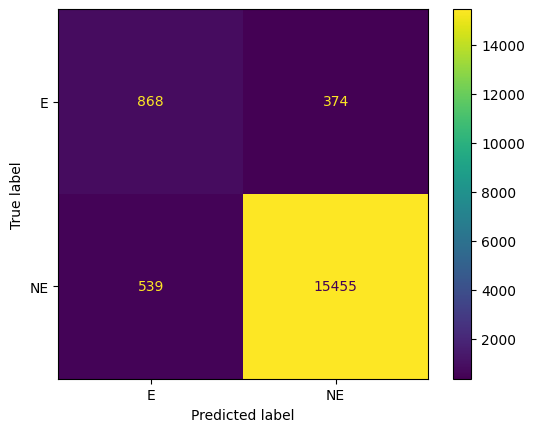

In [6]:
from help.models.prediction import predict_cv
df_scores_means, df_scores, predictions = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, verbose=True, saveflag=True, outfile='pred_Kidney.csv')
df_scores_means

# Prediction with undersampling
Due to the strong unbalancing between the two classes, we can redo prediction model building by undersampling the majority class: this is done by re-applying the `feature_assemble` function with parameter `subsample=True`: this flag set causes the majority class to be downsampled to 4 times the dimension of the minority class. The we re-apply the k-fold cross validation of the a LightGBM classifier.

Majority NE 16678 minoriy E 1253
Subsampling with factor 1:4
[Kidney_BIO.csv] found 52532 Nan...
[Kidney_BIO.csv] Normalization with std ...


Loading file in chunks: 100%|██████████| 5/5 [00:14<00:00,  3.00s/it]


[Kidney_CCcfs.csv] found 6676644 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
[Kidney_EmbN2V_128.csv] found 0 Nan...
[Kidney_EmbN2V_128.csv] No normalization...
6043 labeled genes over a total of 6265
(6043, 3456) data input
{'E': 0, 'NE': 1}
label
NE       4801
E        1242
dtype: int64
Classification with LightGBM...


5-fold: 100%|██████████| 5/5 [02:32<00:00, 30.57s/it]


,measure
ROC-AUC,0.9538±0.0052
Accuracy,0.9125±0.0071
BA,0.8703±0.0163
Sensitivity,0.7987±0.0331
Specificity,0.9419±0.0046
MCC,0.7343±0.0244
CM,"[[992, 250], [279, 4522]]"


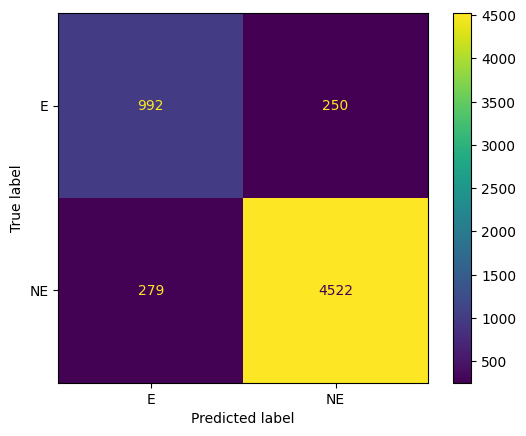

In [12]:
df_y = pd.read_csv(f"{tissue}_HELP.csv", index_col=0)
df_y = df_y.replace({'aE': 'NE', 'sNE': 'NE'})
df_X, df_y = feature_assemble_df(df_y,features=features, subsample=True, fold=4, seed=1, verbose=True)
df_scores_means, df_scores, predictions = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, verbose=True, saveflag=True, outfile='pred_Kidney_sub.csv')
df_scores_means